In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  ,cross_val_score ,GridSearchCV , KFold , train_test_split
from sklearn.metrics import  confusion_matrix , classification_report,accuracy_score, make_scorer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/IOT ml/iot_device_train.csv')
test = pd.read_csv('/content/drive/MyDrive/IOT ml/iot_device_test.csv')
train.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [ ]:
test.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor


In [ ]:
train['device_category'].value_counts()
train = train[train['device_category'] != 'water_sensor']
train['device_category'].value_counts()

security_camera    100
TV                 100
smoke_detector     100
thermostat         100
watch              100
baby_monitor       100
motion_sensor      100
lights             100
socket             100
Name: device_category, dtype: int64

In [ ]:
frames = [train, test]
df = pd.concat(frames, ignore_index=True)
df= df.sample(frac = 1).reset_index(drop = True)
df.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,11,4,7,1382,654,0.898350,728,0,0,1.7705,...,0,0,0,0,0,0,0,0,1,motion_sensor
1,0,0,0,240,0,0.000000,240,0,64,1.4994,...,0,0,0,1,0,0,0,0,0,socket
2,9,5,5,1213,743,1.633047,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,TV
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,0.162859,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,thermostat


In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
ack,11,0,9,9,9,38,9,9,11,22,...,9,22,27,5,9,9,5,60,1,9
ack_A,4,0,5,5,5,20,5,5,4,12,...,5,12,14,2,5,5,2,27,1,4
ack_B,7,0,5,5,5,18,5,5,7,10,...,5,10,13,3,5,5,3,33,0,5
bytes,1382,240,1213,1213,1213,14666,1213,1213,1382,8537,...,1213,4695,9007,656,1213,1213,656,14557,120,1213
bytes_A,654,0,743,743,743,7814,743,743,654,6316,...,743,2148,5365,204,743,743,204,7626,60,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
suffix_is_googleapis.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suffix_is_net,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suffix_is_org,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suffix_is_unresolved,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for c in df.columns:
    if df[c].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [ ]:
all_corr = df.corr().abs()['device_category'].sort_values(ascending = False)
all_corr

device_category             1.000000
reset_A                     0.387969
reset                       0.381240
ttl_B_thirdQ                0.311539
ttl_B_median                0.302541
                              ...   
suffix_is_co.il                  NaN
suffix_is_com.sg                 NaN
suffix_is_googleapis.com         NaN
suffix_is_net                    NaN
suffix_is_org                    NaN
Name: device_category, Length: 298, dtype: float64

In [ ]:
corr_drop = all_corr[all_corr < 0.0001]
corr_drop

ssl_ratio_client_elliptic_curves    3.005050e-17
Name: device_category, dtype: float64

In [ ]:
to_drop = list(corr_drop.index)

In [ ]:
df = df.drop(to_drop, axis = 1)

In [ ]:
df

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,11,4,7,1382,654,0.898350,728,0,0,1.7705,...,0,0,0,0,0,0,0,0,1,3
1,0,0,0,240,0,0.000000,240,0,64,1.4994,...,0,0,0,1,0,0,0,0,0,6
2,9,5,5,1213,743,1.633047,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,0
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,4
4,9,5,5,1213,743,0.162859,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,9,5,5,1213,743,0.977815,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,5
1796,5,2,3,656,204,0.451326,452,0,0,4.0056,...,0,0,0,0,1,0,0,0,0,0
1797,60,27,33,14557,7626,1.100274,6931,0,0,143.4299,...,0,0,0,0,1,0,0,0,0,8
1798,1,1,0,120,60,0.999983,60,0,0,0.0049,...,0,0,0,0,1,0,0,0,0,4


In [ ]:
X = df.drop('device_category', axis=1)
y = df['device_category']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1260, 296), (540, 296))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')

    return model_scores

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier(),'GradientBoostingClassifier': GradientBoostingClassifier()}

In [ ]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
baseline_model_scores

,Score
AdaBoostClassifier,0.527778
SVC,0.837037
KNeighborsClassifier,0.864815
DecisionTreeClassifier,0.872222
GradientBoostingClassifier,0.894444
LogisticRegression,0.896296
RandomForestClassifier,0.901852
XGBClassifier,0.905556


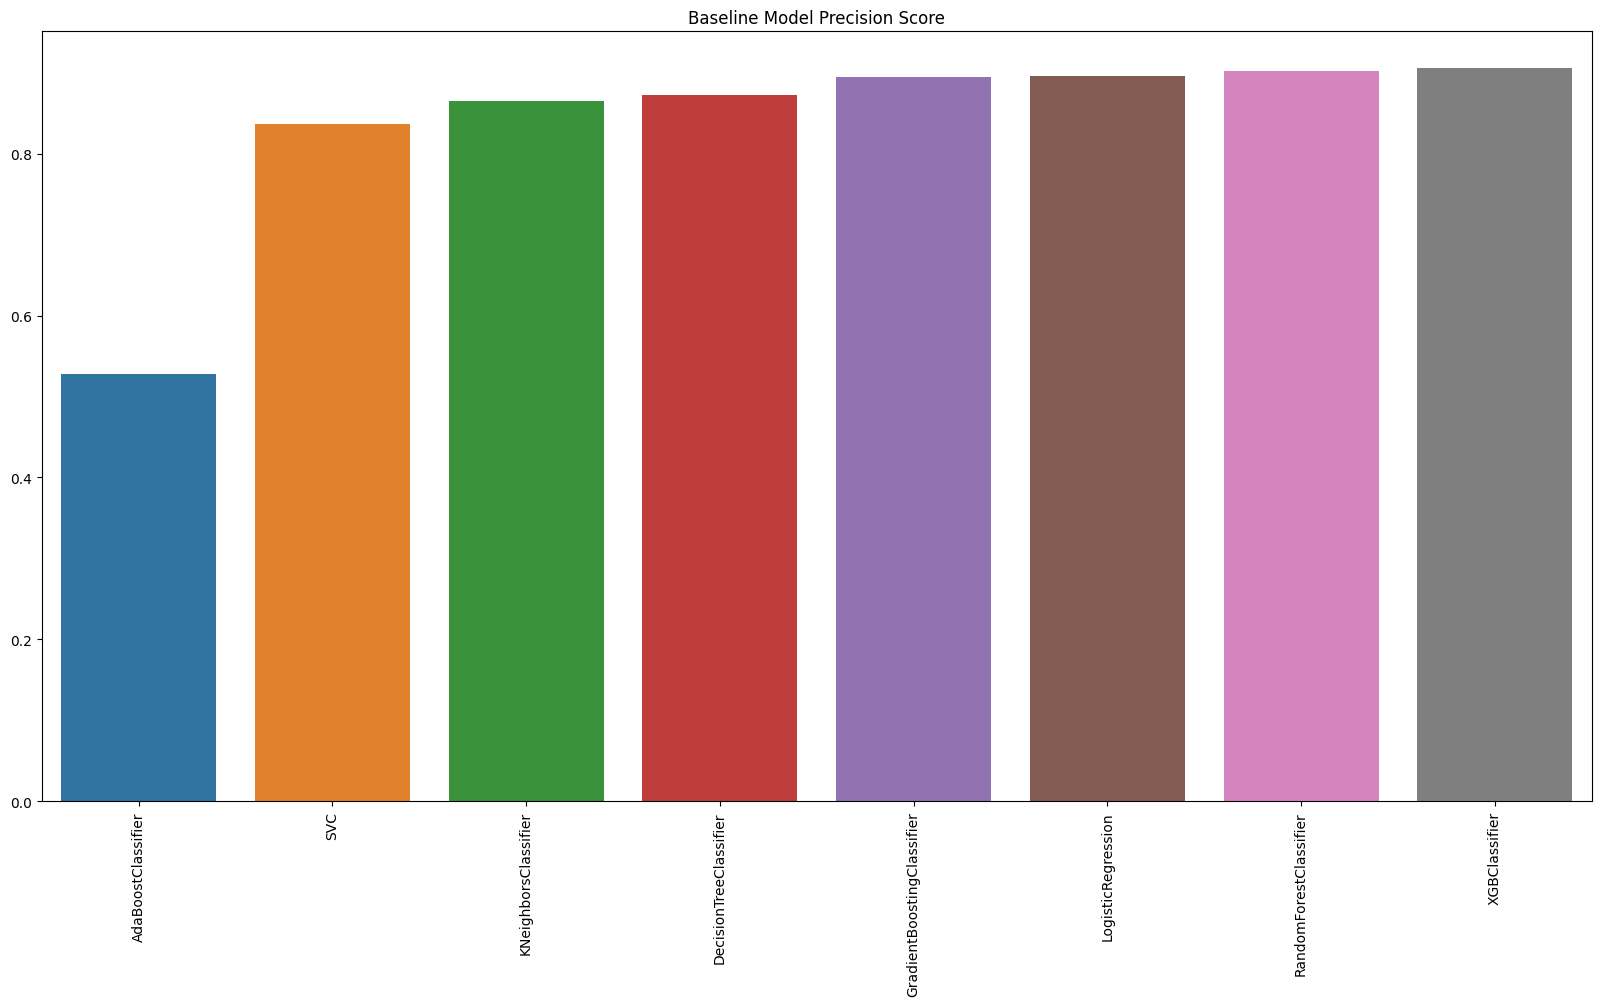

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

In [ ]:
models = list()

randomforest = Pipeline([('m', RandomForestClassifier())])
models.append(('randomforest', randomforest))

XGBClassifier= Pipeline([('m', XGBClassifier())])
models.append(('XGBClassifier', XGBClassifier))
# define the voting ensemble
ABM = VotingClassifier(estimators=models, voting='hard')

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(ABM, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores

array([0.9       , 0.91666667, 0.92222222, 0.9       , 0.91944444,
       0.90555556, 0.88333333, 0.9       , 0.91388889, 0.9       ,
       0.92222222, 0.90555556, 0.91666667, 0.88611111, 0.89166667])

In [ ]:
n_scores.mean()

0.9055555555555556

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.97      1.00      0.99        67
           2       0.65      0.80      0.71        69
           3       0.94      0.98      0.96        47
           4       1.00      1.00      1.00        52
           5       0.98      1.00      0.99        61
           6       0.73      0.54      0.62        65
           7       1.00      0.98      0.99        65
           8       0.97      0.97      0.97        61

    accuracy                           0.90       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.90      0.90      0.90       540

